# Obravnava problema s vzbujanjem y

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Podatki

In [2]:
m = 10 #kg
g = 9.81 #m/s^2
d = 100 #kg/s
k = 1000 #N/m

In [3]:
t = np.linspace(0, 2 * np.pi, 10000)
y = np.sin(t)
x_st = m*g/k
print(f'{x_st} mm')

omega0 = np.sqrt(g/(x_st/1000))
print(f' {omega0:.2f} rad/s')
d_kr = 2*m*omega0
delta = d/d_kr

omega0d = omega0*np.sqrt(1-delta**2)
print(y)



0.0981 mm
 316.23 rad/s
[ 0.00000000e+00  6.28381328e-04  1.25676241e-03 ... -1.25676241e-03
 -6.28381328e-04 -2.44929360e-16]


In [6]:
#create numerical derivative of y
dy = np.diff(y)
dt = np.diff(t)
dydt = dy/dt
dydt = np.append(dydt, dydt[-1])

#create second derivative of y
d2y = np.diff(dydt)
d2t = np.diff(t)
d2ydt2 = d2y/d2t
#crop t, y, dydt, d2ydt2 to the same maximum length
t = t[0:len(t)-2]
y = y[0:len(y)-2]
dydt = dydt[0:len(dydt)-2]
d2ydt2 = d2ydt2[0:len(d2ydt2)-1]



In [11]:
#set plot style to seaborn
plt.style.use('seaborn')

C:\Users\marko\AppData\Local\Temp\ipykernel_20904\3178488801.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


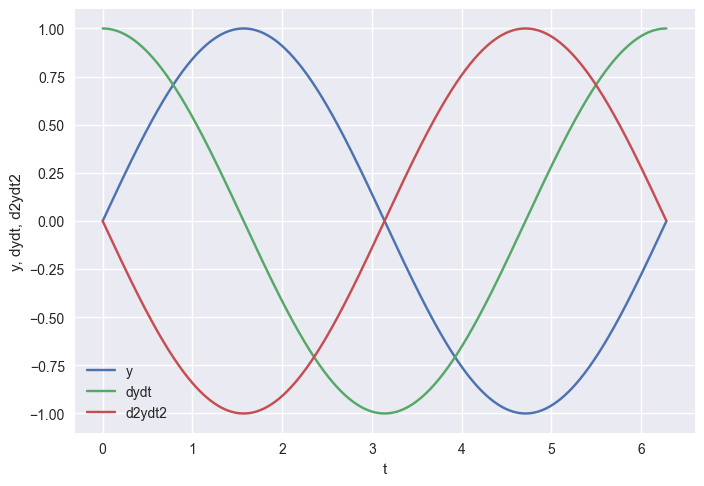

In [13]:
#plot y dyyt and d2ydt2 in one plot
fig, ax1 = plt.subplots()
ax1.plot(t, y, label='y')
ax1.plot(t, dydt, label='dydt')
ax1.plot(t, d2ydt2, label='d2ydt2')
ax1.set_xlabel('t')
ax1.set_ylabel('y, dydt, d2ydt2')
ax1.legend()

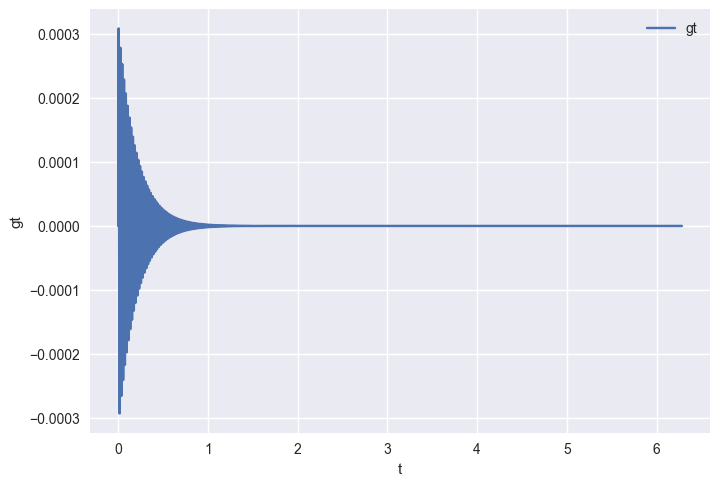

In [15]:
gt = 1/(omega0d * m) * np.exp(-delta*omega0*t) * np.sin(omega0d*t)
#plot gt in a second plot
fig, ax2 = plt.subplots()
ax2.plot(t, gt, label='gt')
ax2.set_xlabel('t')
ax2.set_ylabel('gt')
ax2.legend()

In [ ]:
#numerical integral